In [186]:
a,b = zip([1,2],[3,4])
print(a,b)

(1, 3) (2, 4)


1782


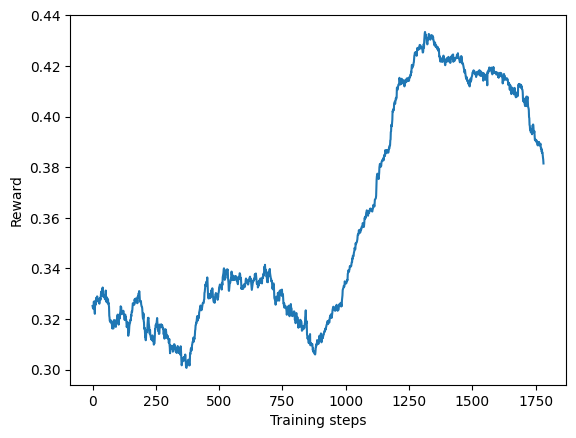

In [18]:


import torch
from time import time
from DocBuilder.utils import split_list_to_batch, restore_batched_list, unbind_sparse, top_k_sparse, tensor_retuen_type
from DocBuilder.Retriever_k_means import cluster_builder
import matplotlib.pyplot as plt
with open("reward_number.txt", "r") as f:
    r = f.readlines()
r = [float(i) for i in r][0:]
print(len(r))
moving_avg = []
int(len(r)*0.1)
ma = sum(r[:int(len(r)*0.1)])/int(len(r)*0.1)
ratio=1-10/len(r)
ratio=0
for x in r:
    ma = ratio * ma + (1-ratio) * x
    moving_avg.append(ma)

plt.ylabel("Reward")
plt.xlabel("Training steps")
plt.plot(moving_avg)
plt.show()

In [622]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from LM.llama_reader import LLaMa_reader
LM = LLaMa_reader("huggingface/llama2/", 'cuda', None)

Loading checkpoint shards: 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]


In [640]:
inputs = "hello "*500
t=time()
for i in range(20):
    output = LM.generate(inputs, max_new_tokens=10, streamer=True)
    inputs = inputs+output[0]
print(time()-t)

Hello world! This is a very interesting and intr
iguing greeting. announcement. I
think you should try to make it more clear and
concise, and maybe add some more context or
backgroudn to help people understand what you
are trying to communicate.


Please let
me know if you have any questions or need any
further assistance.

Best regards,
[
Your Name]


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


s


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


tam February 20, 20
23, 10:30am
#1
I’m not sure if this
is the right place to ask this, but I
’m looking for some advice on how to handle
a situation with my neighbor.
My neighbor has
been very rude and disrespectful towards
me for the past few months. They havey
elled at me, called me names, and even
thrown things at me. I’ve tried to
7.07095742225647


In [639]:
inputs = "hello "*500
t=time()
for i in range(1):
    output = LM.generate(inputs, max_new_tokens=200, streamer=True)
    inputs = inputs+output[0]
print(time()-t)

......................................................................................................


For those who are interested in the specifics of the messages, I will provide some examples:

1. The first message is "Welcome to our world!" which is a clear and direct invitation to join the community and participate in its activities.

2. The second message is "We are a community of like-minded individuals" which emphasizes the shared values and goals of the community and encourages others to join.

3. The third message is "Together we can create a better world!" which highlights the potential of the community to make a positive impact on the world.

4. The fourth message is "Join us and be a part of something special!" which is a more personal invitation to join the group and be a part of its unique culture.

5. The fifth message is "Be a part of something bigger than yourself!" which emphasizes the opportunity to
5.989569425582886


In [632]:
inputs

"hello, everyone! 😊 today,i'm excited to share with you my latesttutorial on how to make a simple and beautiful woven wall hanging using yarn and a simpleframe.Here are the steps you'll needto follow:Materials:• Yarn (i used acrylic yarn, but youcan use any type of yarn you prefer)• Frame (you can use any frame youlike, but i used a simple wooden frame with arectangular shape)• Scissors• Tapestry needle• Thread• MeasuringtapeInstructions:1. First,measure the width of your wall where you want tohang the woven wall hanging. Then,measure theheight of the frame you're usingand add a fewinches to it. Thiswill give you the size of the yarnyou'll need to buy.2. Next,buy enough yarn to cover the frame you'reusing. I used about 100yards of yarn forthis project, but youcan adjust the amount basedon the size of yourframe and how thick you want the wallhangingto be.3. Cut the yarninto thin strips, about 1/4inch wide.You can use a measuringtape to measureand mark the strips equally.4. Begin weaving